In [5]:
from graphviz import Digraph
# import thermo.chemical as chem
import CoolProp.CoolProp as CP
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..', 'data'))

In [6]:
import thermo_data_simple as tds

## Electrolysis
H2O + energy = H2 + 1/2 O2  
For the efficiency of electrolysis process, see [here](https://en.wikipedia.org/wiki/Electrolysis_of_water#Efficiency)
* Alkaline technology: ~ 70%
* Proton Exchange Membranes (PEM): ~ 80% (and apparently increasing)

## Other methods
* See [this](https://www.energy.gov/sites/prod/files/2017/11/f46/HPTT%20Roadmap%20FY17%20Final_Nov%202017.pdf)
* Also see [this](https://www.sciencedirect.com/science/article/pii/S0360319919345276)

In [14]:
# Electrolysis reaction and its energy requirement
h_form_H2O = tds.get_property('H2O', 'dh_form')
dg_electrolysis = tds.get_property('H2', 'dg_form')+ \
                  1/2*tds.get_property('O2', 'dg_form')- \
                  tds.get_property('H2O', 'dg_form')
dh_electrolysis = -h_form_H2O # J/mol
dh_electrolysis, dg_electrolysis # J/mol

T_env = 20+273.15
p_env = 1.01e5 # Pa
rho_H2 = CP.PropsSI('DMOLAR', 'T', T_env, 'P', p_env, 'H2') # m3/mol
eta_electrolysis = 0.7 # efficiency
ex_H2_prod = dh_electrolysis/eta_electrolysis
ex_H2_prod # J/mol at environmental condition

345448.5714285715

## CO2 recycling
Sabatier reaction:  
CO2 + 4 H2 = CH4 + 2 H2O  
At 400 degC  
High pressure (assume 100 bar)  

Energy requirement:
* CO2 production or extraction
    - extraction from the air
    - biomass
    - Fossil-fuel based
* H2 production
* Compression and heat

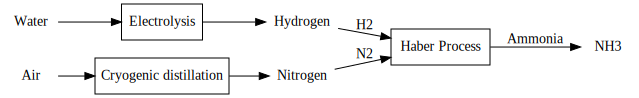

In [7]:
f = Digraph('Process flow diagram', format='svg', filename='fsm.gv')
f.attr(rankdir='LR', size='10,6')

f.attr('node', shape = 'none')
f.node('N2', label = 'Nitrogen')
f.node('H2', label = 'Hydrogen')
f.node('Air')
f.node('NH3')
f.node('Water')

f.attr('node', shape = 'rectangle')
f.node('HP', label = 'Haber Process')
f.node('CD', label = 'Cryogenic distillation')
f.node('Electrolysis')

f.edge('N2', 'HP', label='N2')
f.edge('H2', 'HP', label='H2')
f.edge('HP', 'NH3', label='Ammonia')
f.edge('Air', 'CD')
f.edge('CD', 'N2')
f.edge('Water', 'Electrolysis')
f.edge('Electrolysis', 'H2')

f.render()
f

## Process flow diagram
![pfd](./fsm.gv.svg)

In [6]:
T = 400+273.15 # K
P = 100e5 # Pa
# skip the thermo package for the time being
# CO2 = chem.Chemical('CO2', T=T, P=P)
# H2 = chem.Chemical('H2')
# CH4 = chem.Chemical('CH4')
# H2O = chem.Chemical('H2O')

In [7]:
CO2.set_thermo()
CO2.Hm

15717.689048763968

In [16]:
h_form_CO2 = tds.get_property('CO2', 'dh_form')
h_CO2 = CP.PropsSI('Hmolar', 'T', T, 'P', P, 'CO2')
h_form_CO2+h_CO2

-355470.54619069945

In [17]:
CO2.calc_H(T=T, P=P), h_CO2

(16430.67842199853, 38039.45380930058)

In [13]:
print(CO2.Hf, h_form_CO2)

-393530.0 -393510.0


In [11]:
CO2.Hf+CO2.calc_H(T=T, P=P)


-377099.3215780015

## Haber process
N2 + H2 = NH3  

Pressure = 150 to 250 bar  
Temperature = 400 to 500 degC

## Fischer-Tropsch process
(2n + 1) H2 + n CO → CnH2n+2 + n H2O

* Requires CO and H2
* T = 150 to 300 degC
* P = 1 to 100 bar

## Methanol
CO2 + 3 H2 → CH3OH + H2O

* p = 50-100 bar
* T = 250 degC

Requires H2 and in some cases CO
    

In [1]:
from CoolProp.CoolProp import PropsSI

See a list of components [here](http://www.coolprop.org/fluid_properties/PurePseudoPure.html#list-of-fluids)



In [2]:
from CoolProp.CoolProp import PropsSI
T1 = 25+273.17
p1 = 1e5

H_H2 = PropsSI("Hmolar", "P", p1, "T", T1, "H2")
H_O2 = PropsSI("Hmolar", "P", p1, "T", T1, "O2")
H_H2O = PropsSI("Hmolar", "P", p1, "T", T1, "H2O")

# Perry's chemical engineers' handbook
# http://web.mit.edu/2.813/www/readings/APPENDIX.pdf

dH_electrolysis = H_H2+1/2*H_O2 - H_H2O
print(dH_electrolysis)
print(H_H2)

10371.312768632817
7926.618188636264


In [7]:
H1 = PropsSI("Hmolar", "P", 1e5, "T", 300, "H2")
H2 = PropsSI("Hmolar", "P", 100e5, "T", 300, "H2")
print(H2-H1)

V = 1/PropsSI("Dmolar", "P", 200e5, "T", 80+273.15, "H2")
print(V)

94.67214965468065
0.00016256103926824098


In [10]:
H2 = PropsSI("Hmolar", "P", p1, "T", T1, "NH3")
H2 = PropsSI("Hmolar", "P", p1, "T", T1, "CO2")
H2 = PropsSI("Hmolar", "P", p1, "T", T1, "N2")
H2 = PropsSI("Hmolar", "P", p1, "T", T1, "CH4")

Z = PropsSI("Z", "P", 200e5, "T", 353.15, "CH4")
print(Z)

0.9277802771885068


In [11]:
PropsSI("Hmolar", "P", 1e5, "T", 300, "H2O")

2029.4862307757198